# 1. Understand churn phenomenon.

1. Keeping customers is cheaper because it avoids the high costs of finding and convincing new people to join.

2. High churn often means customers are unhappy or find better options elsewhere, showing the company might not be meeting needs or keeping up with competitors.

# 2. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 3. Load and Explore the Dataset

In [37]:
# Load the data
df = pd.read_csv('customers.csv')

In [ ]:
# Examine the data shape and types
print(df.shape)
print(df.info())

# Examine the missing values
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

In [40]:
# Basic statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


# 4. Visualization


/var/folders/_p/stbgbx154_v2mk71nn05yw5r0000gn/T/ipykernel_29476/3713625660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


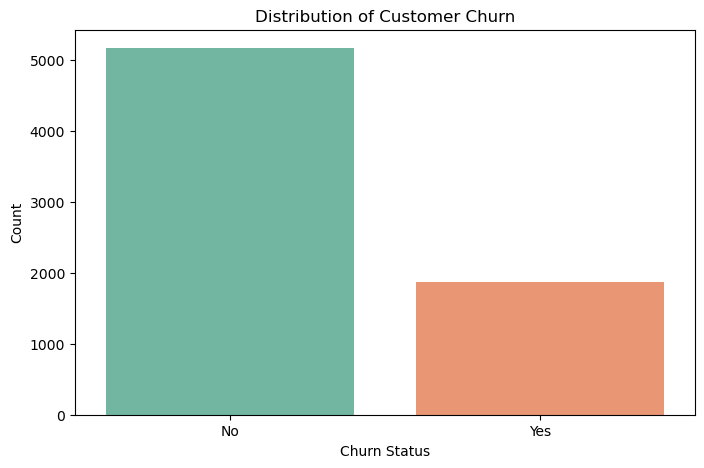

/var/folders/_p/stbgbx154_v2mk71nn05yw5r0000gn/T/ipykernel_29476/3713625660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')


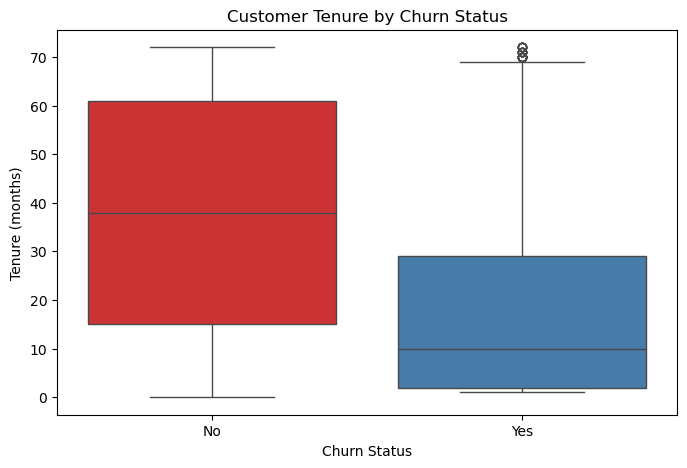

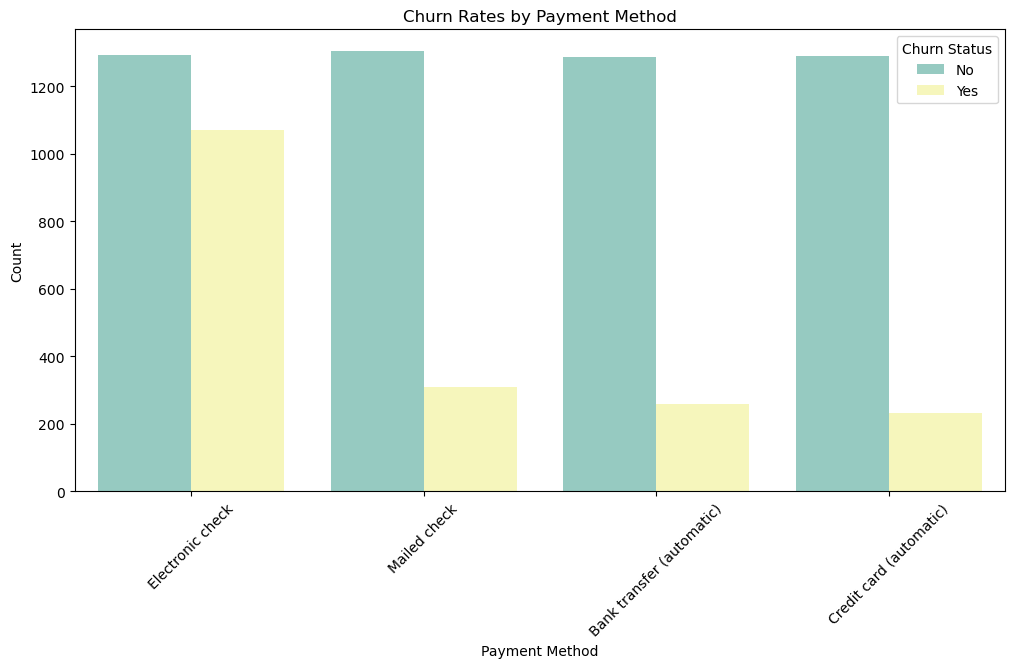

In [41]:
# Plot the distribution of customer churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Customer Churn')
plt.show()

# Compare the tenure of churned vs. retained customers with a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (months)')
plt.title('Customer Tenure by Churn Status')
plt.show()


# Explore the relationship between payment methods and churn with a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set3')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Rates by Payment Method')
plt.xticks(rotation=45)  # Adjust the label rotation for better readability
plt.legend(title='Churn Status')
plt.show()


# 5. Data Preprocessing

In [49]:
# Initialize a preprocessing pipeline 

# Define the categorical and numerical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the categorical and numerical Pipelines
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine the 2 Pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])


In [50]:
# Create the X and the Y Dataframes
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformation pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


# 6. Predicton

In [51]:
# Instantiate a LogisticRegression model
model = LogisticRegression()

# Fit the model
model.fit(X_train_transformed, y_train)

# Predict on X_test
predictions = model.predict(X_test_transformed)

In [57]:
# Model evaluation
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, pos_label='Yes'))
print('Recall:', recall_score(y_test, predictions, pos_label='Yes'))
print('F1 Score:', f1_score(y_test, predictions, pos_label='Yes'))

Accuracy: 0.8183108587650816
Precision: 0.6756756756756757
Recall: 0.6032171581769437
F1 Score: 0.6373937677053825


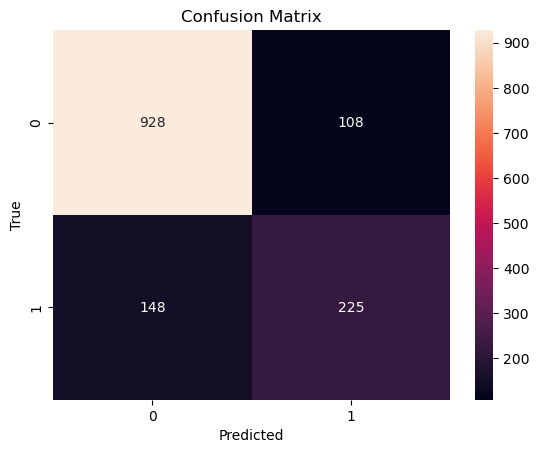

In [58]:
# Confusion matrix
confusion_mtx = confusion_matrix(y_test, predictions)
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model results :
 * The confusion matrix shows the model effectively identifies customers who won't churn (high specificity) but is less accurate in pinpointing actual churn cases (moderate recall). Improving the model's ability to reduce missed churn predictions (false negatives) is key for better performance.
